In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28,1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28,1))

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

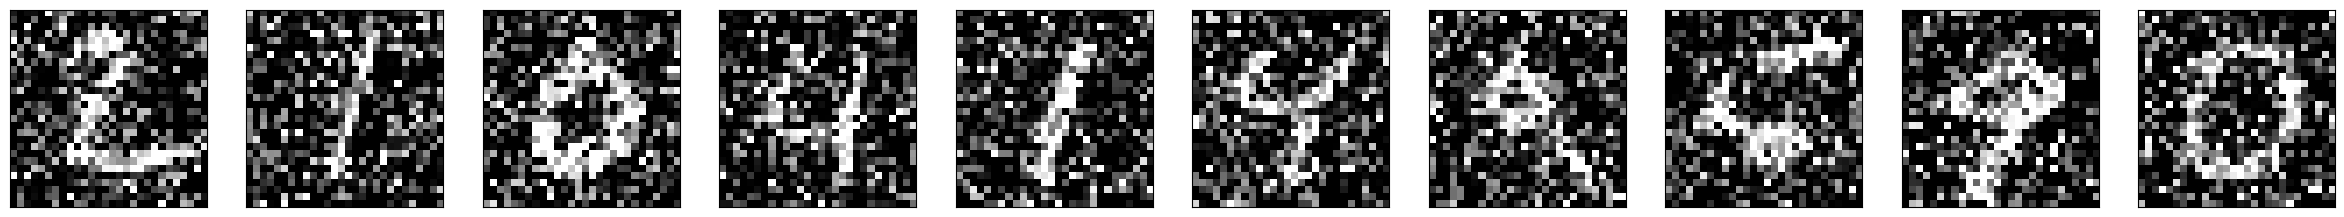

In [ ]:
n = 10
plt.figure(figsize=(30, 10))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16,(9,9),activation = 'relu',padding = 'same')(input_img)
x = layers.MaxPool2D((2,2),padding='same')(x)
x = layers.Conv2D(8,(7,7),activation = 'relu',padding = 'same')(x)
x = layers.MaxPool2D((2,2),padding='same')(x)
x = layers.Conv2D(1,(3,3),activation = 'relu',padding = 'same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8,(3,3),activation = 'relu',padding = 'same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(8,(5,5),activation = 'relu',padding = 'same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16,(3,3),activation = 'relu')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1, (9, 9), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_139 (Conv2D)         (None, 28, 28, 16)        1312      
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_140 (Conv2D)         (None, 14, 14, 8)         6280      
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_141 (Conv2D)         (None, 7, 7, 1)           73 

In [ ]:
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=2,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/2
59/59 [==============================] - 6s 51ms/step - loss: 0.3924 - accuracy: 0.8046 - val_loss: 0.2691 - val_accuracy: 0.7973
Epoch 2/2
59/59 [==============================] - 2s 41ms/step - loss: 0.2572 - accuracy: 0.8029 - val_loss: 0.2401 - val_accuracy: 0.7951


In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


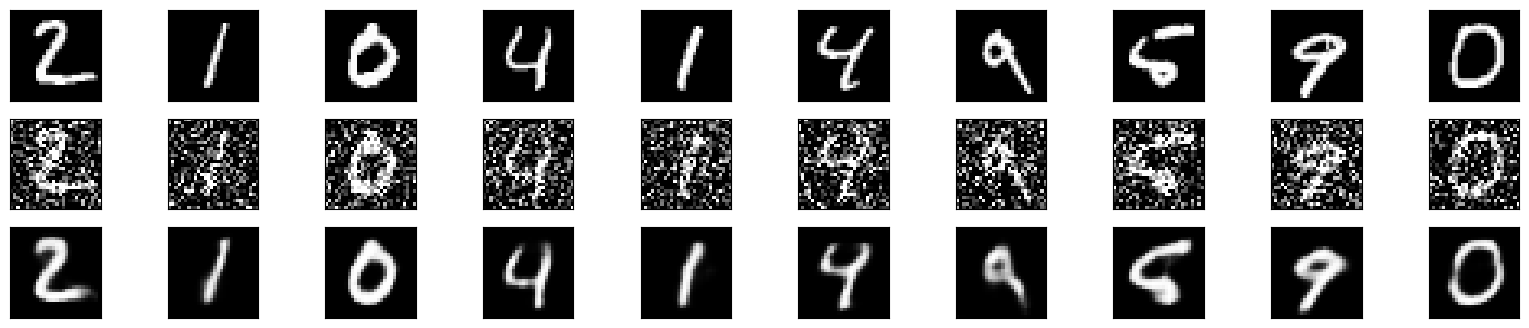

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()